## 1- importer les bibliothéques

In [55]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils import resample
from keras.models import load_model
from scipy import stats
from matplotlib.ticker import MultipleLocator as Ml
from matplotlib.ticker import ScalarFormatter as SF


## 2- fixer les path des données

In [2]:
sj_path='/kaggle/input/sjdata/DATA_(512,512)/sj_data'
nsj_path='/kaggle/input/sjdata/DATA_(512,512)/nsj_data'
path_model="/kaggle/input/modelsj/ModelSjogren.h5"

# importer le modéle

In [3]:
# Charger le modèle
model = load_model(path_model)

## Mise en Forme des images

In [4]:

def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [5]:
sj_original=mise_tenseur(sj_path,512,512,1)
nsj_original=mise_tenseur(nsj_path,512,512,1)

In [6]:
# diviser la base en 2
nsj_org_data=nsj_original
sj_org_data=sj_original
label_nsj = [0] * len(nsj_org_data)  # labels pour la première classe (0)
label_sj = [1] * len(sj_org_data)  # labels pour la deuxième classe (1)
# Fusionner les données et les labels en un seul tableau multidimensionnel
data2 = np.concatenate([nsj_org_data, sj_org_data])
print(len(data2))
labels2 = np.concatenate([label_nsj, label_sj])
len(labels2)


225


225

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data2,labels2,test_size=0.2,random_state=42)

In [8]:
import numpy as np
from sklearn.utils import resample


n_iterations = 1000
# Initialiser les listes pour stocker les mesures de performance
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
lrs_plus = []
lrs_moins = []

for _ in range(n_iterations):
    # Perform bootstrap resampling on the training data
    x_sample,y_sample = resample(x_train,y_train, n_samples=150, random_state=48)
    # Train the model on the bootstrap sample
    model.fit(x_sample,y_sample)
    #evaluer le modele 
    y_pred = model.predict(x_test)
    y_pred_classes = np.where(y_pred>0.5,1.,0)
    # calculer les métriques d'évaluation
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
    lr_plus= recall / (1 - tn / (tn + fp))
    lr_moins = (1 - recall) / (tn / (tn + fp))
    
    
    # Stocker les mesures de performance pour l'itération actuelle
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    lrs_plus.append(lr_plus)
    lrs_moins.append(lr_moins)

2/2 [==============================] - 0s 277ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 39ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 43ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 39ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 41ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 34ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 41ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 41ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 40ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 40ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 44ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 42ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 42ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


1/5 [=====>........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 40ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 34ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 38ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 35ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 37ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


2/2 [==============================] - 0s 36ms/step


/tmp/ipykernel_16306/272332216.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


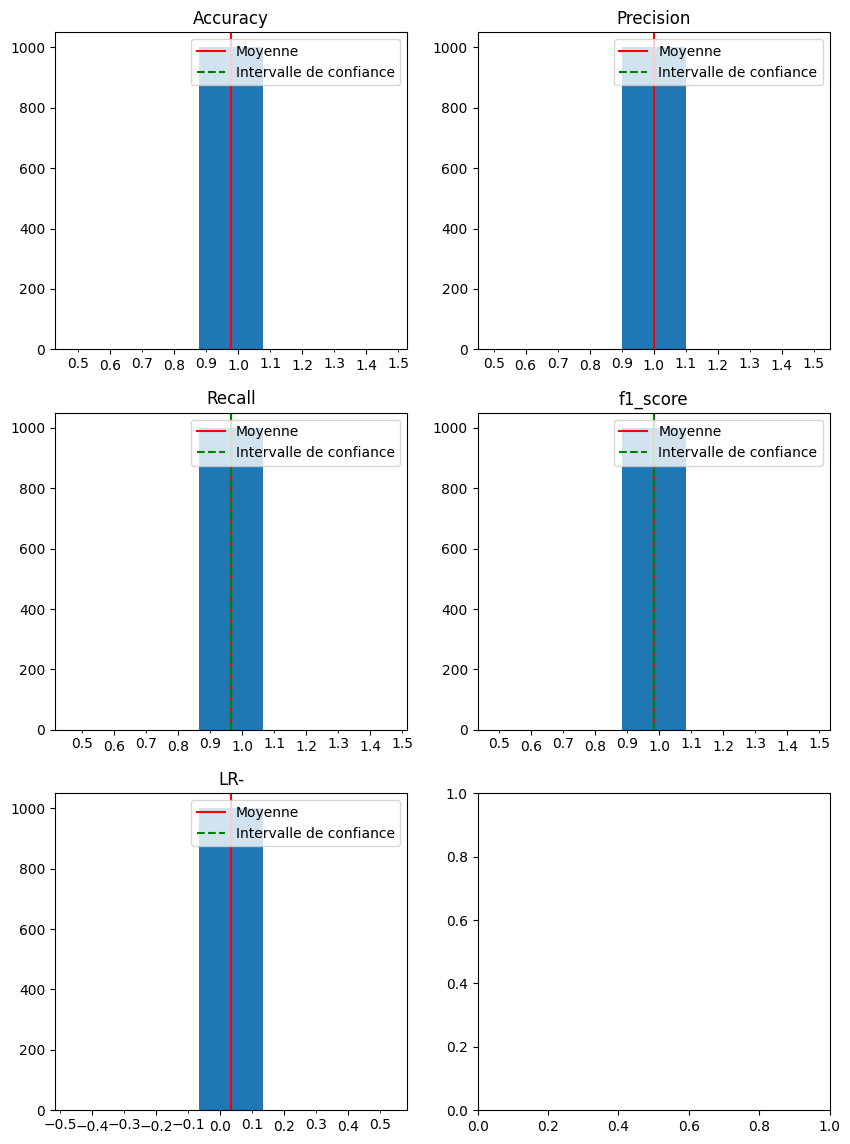

In [74]:


fig, axs = plt.subplots(3, 2, figsize=(10,14))
axs = axs.ravel()

# métriques +scores
metrics = ['Accuracy','Precision','Recall','f1_score','LR-',]
scores = [accuracy_scores, precision_scores, recall_scores,f1_scores,lrs_moins]

for i in range(len(metrics)):
    # calculer l'intervalle de confiance à 95 % pour chaque métrique
    conf_interval = stats.t.interval(0.95, len(scores[i])-1, loc=np.mean(scores[i]), scale=stats.sem(scores[i]))
    
    # tracer l'histogramme avec l'intervalle de confiance
    axs[i].hist(scores[i], bins=5)
    axs[i].xaxis.set_minor_locator(Ml(0.1))
    axs[i].xaxis.set_minor_formatter(SF())
    # Définir l'échelle de l'axe des abscisses
    axs[i].axvline(np.mean(scores[i]), color='red', label='Moyenne')
    axs[i].axvline(conf_interval[0], color='green', linestyle='--', label='Intervalle de confiance')
    axs[i].axvline(conf_interval[1], color='green', linestyle='--')
    axs[i].set_title(metrics[i])
    axs[i].legend()

# afficher le graphique
plt.show()

In [75]:
print(np.mean(f1_scores))
print(np.mean(lrs_plus ))
print(np.mean(lrs_moins ))

0.9824561403508768
inf
0.03448275862068961
